# World happiness report
The World Happiness Report 2021 focuses on the effects of COVID-19 and how people all over the world have fared. Their aim was two-fold, first to focus on the effects of COVID-19 on the structure and quality of people’s lives, and second to describe and evaluate how governments all over the world have dealt with the pandemic. In particular, they try to explain why some countries have done so much better than others.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# Reading dataset
df=pd.read_csv("world-happiness-report-2021.csv")

In [3]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
df.shape

(149, 20)

In [5]:
# Checking for null values
df.isnull().any()

Country name                                  False
Regional indicator                            False
Ladder score                                  False
Standard error of ladder score                False
upperwhisker                                  False
lowerwhisker                                  False
Logged GDP per capita                         False
Social support                                False
Healthy life expectancy                       False
Freedom to make life choices                  False
Generosity                                    False
Perceptions of corruption                     False
Ladder score in Dystopia                      False
Explained by: Log GDP per capita              False
Explained by: Social support                  False
Explained by: Healthy life expectancy         False
Explained by: Freedom to make life choices    False
Explained by: Generosity                      False
Explained by: Perceptions of corruption       False
Dystopia + r

This shows that there is no null value present in the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [7]:
# Description of data
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


#### Correlation between columns

<AxesSubplot:>

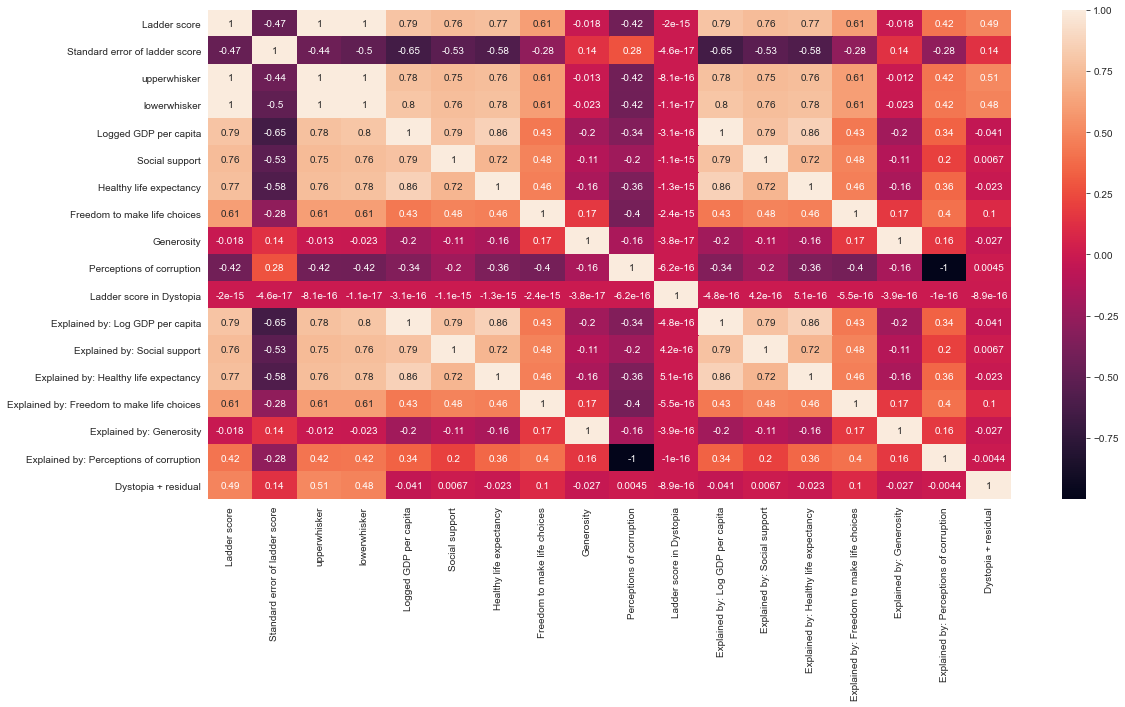

In [8]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True)

### Data exploration

#### Ladder score

In [9]:
ladder_score = df[['Ladder score',"Standard error of ladder score",'Country name']].sort_values("Ladder score",ascending=False)

In [10]:
ladder_score[:10]

,Ladder score,Standard error of ladder score,Country name
0,7.842,0.032,Finland
1,7.620,0.035,Denmark
2,7.571,0.036,Switzerland
3,7.554,0.059,Iceland
4,7.464,0.027,Netherlands
5,7.392,0.035,Norway
6,7.363,0.036,Sweden
7,7.324,0.037,Luxembourg
8,7.277,0.040,New Zealand
9,7.268,0.036,Austria


Text(0.5, 1.0, 'First 12 ladder scores')

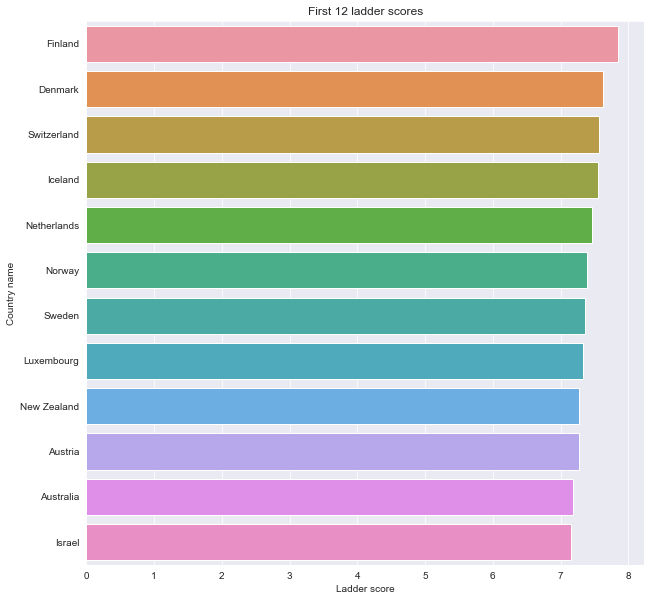

In [37]:
# Top 12 countries according to ladder score
plt.figure(figsize=(10,10))
sns.barplot(x="Ladder score",y="Country name",data=ladder_score[:12])
plt.title("First 12 ladder scores")

Text(0.5, 1.0, 'Last 12 ladder scores')

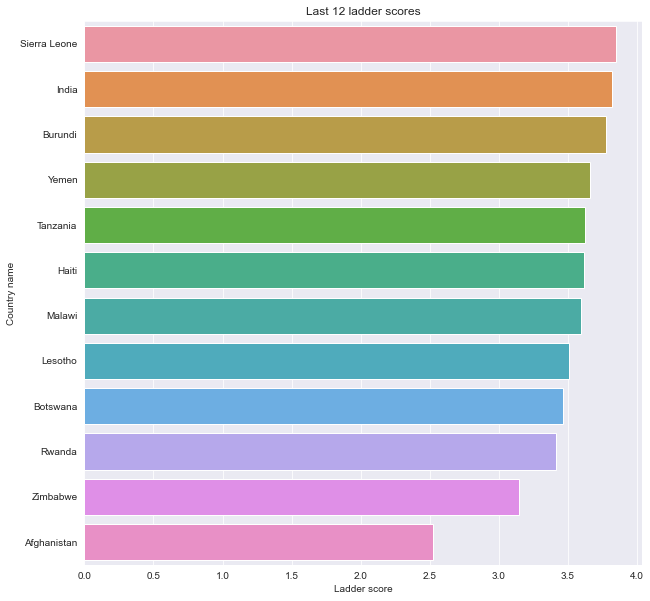

In [36]:
# Bottom 12 countries according to ladder score
plt.figure(figsize=(10,10))
sns.barplot(x="Ladder score",y="Country name",data=ladder_score.tail(12))
plt.title("Last 12 ladder scores")

We can conclude that Finland has the highest ladder score whereas Afghanistan has the lowest.

#### GDP per capita

In [13]:
gdp = df[["Logged GDP per capita", "Country name","Regional indicator"]].sort_values("Logged GDP per capita",ascending=False)

gdp.head(10)

,Logged GDP per capita,Country name,Regional indicator
7,11.647,Luxembourg,Western Europe
31,11.488,Singapore,Southeast Asia
14,11.342,Ireland,Western Europe
2,11.117,Switzerland,Western Europe
24,11.085,United Arab Emirates,Middle East and North Africa
5,11.053,Norway,Western Europe
18,11.023,United States,North America and ANZ
76,11.000,Hong Kong S.A.R. of China,East Asia
1,10.933,Denmark,Western Europe
4,10.932,Netherlands,Western Europe


In [14]:
gdp.tail(10)

,Logged GDP per capita,Country name,Regional indicator
142,7.477,Haiti,Latin America and Caribbean
137,7.434,Sierra Leone,Sub-Saharan Africa
134,7.396,Madagascar,Sub-Saharan Africa
127,7.364,Chad,Sub-Saharan Africa
135,7.362,Togo,Sub-Saharan Africa
119,7.288,Liberia,Sub-Saharan Africa
114,7.158,Mozambique,Sub-Saharan Africa
95,7.098,Niger,Sub-Saharan Africa
143,6.958,Malawi,Sub-Saharan Africa
139,6.635,Burundi,Sub-Saharan Africa


In [15]:
print("Average GDP : {}".format(np.mean(gdp['Logged GDP per capita'])))

Average GDP : 9.432208053691266


In [16]:
regional_gdp=gdp.groupby(by="Regional indicator",axis=0).mean().sort_values(by="Logged GDP per capita")

In [17]:
gdp.groupby(by="Regional indicator",axis=0).mean().sort_values(by="Logged GDP per capita")

,Logged GDP per capita
Regional indicator,
Sub-Saharan Africa,8.075194
South Asia,8.682571
Latin America and Caribbean,9.370000
Commonwealth of Independent States,9.401833
Southeast Asia,9.421444
Middle East and North Africa,9.666118
Central and Eastern Europe,10.109059
East Asia,10.367667
North America and ANZ,10.809500


This shows that country Luxembourg has the highest logged GDP per capita whereas Haiti has the lowest.<br>
If we see regions, then Sub-Saharan Africa has the lowest logged GDP per capita whereas Western Europe has the highest.

#### Social support

In [18]:
social_support = df[["Social support","Country name"]].sort_values("Social support",ascending = False)
social_support.tail(10)

,Social support,Country name
127,0.619,Chad
138,0.603,India
135,0.569,Togo
105,0.560,Morocco
146,0.552,Rwanda
142,0.540,Haiti
143,0.537,Malawi
139,0.490,Burundi
98,0.489,Benin
148,0.463,Afghanistan


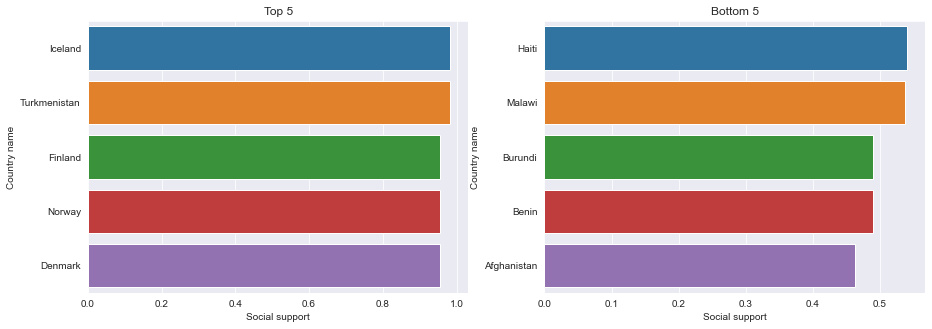

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(121); sns.barplot(data = social_support.head(5),x='Social support',y = "Country name"); plt.title("Top 5")
plt.subplot(122); sns.barplot(data = social_support.tail(5),x='Social support',y = "Country name"); plt.title("Bottom 5");

We can conclude that Iceland is on the top according to social support while Afghanistan is at the bottom.

#### Healthy Life expectancy & Freedom to make life choices

In [20]:
hlef = df[["Freedom to make life choices","Healthy life expectancy","Country name","Regional indicator"]].sort_values("Healthy life expectancy",ascending=False)
hlef.head()

,Freedom to make life choices,Healthy life expectancy,Country name,Regional indicator
31,0.927,76.953,Singapore,Southeast Asia
76,0.717,76.820,Hong Kong S.A.R. of China,East Asia
55,0.796,75.100,Japan,East Asia
26,0.761,74.700,Spain,Western Europe
2,0.919,74.400,Switzerland,Western Europe


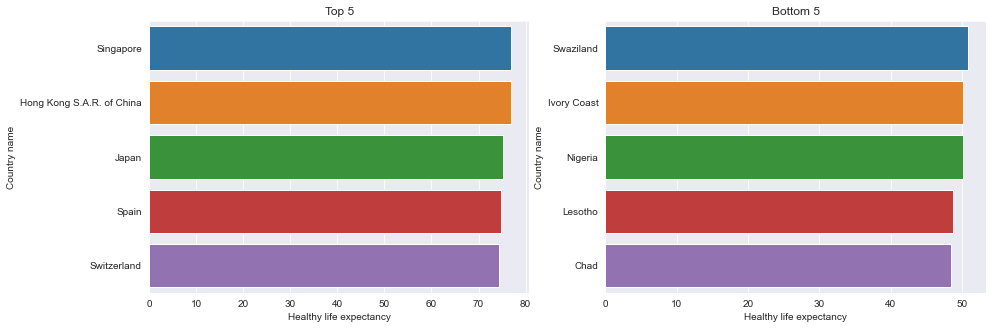

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(121); sns.barplot(data = hlef.head(5),x='Healthy life expectancy',y = "Country name"); plt.title("Top 5")
plt.subplot(122); sns.barplot(data = hlef.tail(5),x='Healthy life expectancy',y = "Country name"); plt.title("Bottom 5");

This shows that Singapore has the highest healthy life expectancy whereas Chad has the lowest.

### Applying ML algo

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [22]:
df.drop(['Standard error of ladder score', 'Perceptions of corruption'], inplace = True, axis = 1)

In [23]:
df.drop(['Country name','Regional indicator'], axis =1, inplace = True)

In [24]:
X = df.drop(['Ladder score'], axis = True)
y = df['Ladder score']

In [25]:
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,1.000000,1.000000,0.826018,0.944231,0.826058,0.964286,0.228916,0.0,0.825814,0.943686,0.826087,0.965084,0.229205,0.879342,0.919195
1,0.959118,0.957231,0.857542,0.944231,0.850641,0.959184,0.383133,0.0,0.857796,0.945392,0.850613,0.958101,0.384473,0.886654,0.783345
2,0.950829,0.947477,0.894254,0.921154,0.910342,0.913265,0.377108,0.0,0.894346,0.920648,0.909699,0.912011,0.377079,0.755027,0.773112
3,0.955916,0.935847,0.846568,1.000000,0.861176,0.974490,0.539759,0.0,0.846374,1.000000,0.860647,0.974860,0.541590,0.310786,0.818278
4,0.927280,0.930595,0.857342,0.921154,0.840105,0.903061,0.557831,0.0,0.857224,0.920648,0.839465,0.903631,0.558226,0.702011,0.758645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.217031,0.155130,0.257582,0.623077,0.007796,0.566327,0.189157,0.0,0.257567,0.623720,0.007804,0.565642,0.190388,0.027422,0.406493
145,0.191221,0.163759,0.627893,0.617308,0.378964,0.751701,0.050602,0.0,0.627641,0.617747,0.379041,0.752793,0.049908,0.160878,0.000000
146,0.179352,0.156256,0.207702,0.171154,0.453802,0.875850,0.420482,0.0,0.207881,0.172355,0.453735,0.875698,0.419593,0.901280,0.157728
147,0.124906,0.108985,0.260974,0.551923,0.271220,0.501701,0.290361,0.0,0.260994,0.553754,0.270903,0.501397,0.290203,0.137112,0.196542


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.7, random_state =45)

In [27]:
X_train.shape

(44, 15)

In [28]:
y_train.shape

(44,)

In [29]:
y_test.shape

(105,)

In [30]:
X_test.shape

(105, 15)

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
lr.predict(X_test)

array([7.84188623, 6.16613586, 4.325143  , 7.55416302, 6.32990331,
       6.15173529, 6.22338171, 4.83042662, 4.58387605, 3.77479779,
       6.46091934, 4.208507  , 4.83369132, 4.95650866, 4.27468446,
       6.31627213, 3.51208511, 3.62383841, 6.17914587, 5.26572439,
       5.30552035, 5.28270672, 4.79463875, 6.01194053, 7.46422326,
       4.85217646, 5.13168628, 5.76647789, 7.18360125, 5.14154128,
       5.47687176, 4.94742626, 3.8495779 , 5.02456292, 6.49373837,
       4.07345368, 7.10308267, 6.49096809, 5.53336815, 6.43126007,
       6.33063862, 5.3418034 , 7.61980763, 5.99193201, 5.11739955,
       6.64657726, 4.28842442, 5.83971773, 4.89150512, 6.25550838,
       6.13982204, 5.74383131, 4.35539287, 6.06041655, 3.61452355,
       6.8338362 , 6.43434793, 5.10150268, 6.0774056 , 5.17076576,
       5.54505   , 4.72124965, 5.67739845, 3.6575347 , 7.57158771,
       6.18927591, 6.17891427, 6.58454894, 5.58053185, 7.32418024,
       6.0317934 , 4.57403939, 5.38467181, 5.53570556, 5.06639

In [33]:
from sklearn.metrics import mean_squared_error
y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# on testing set
y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

from sklearn.metrics import r2_score
print("\nR2 score:",r2_score(y_test,y_test_predict))


The model performance for training set
RMSE is 0.0002409832120265191


The model performance for testing set
RMSE is 0.00040024035656940763

R2 score: 0.9999998535764928


The accuracy of our prepared model is 99.99%

#### Conclusion:
1. Finland has the highest ladder score whereas Afghanistan has the lowest.
2. Luxembourg has the highest logged GDP per capita whereas Haiti has the lowest.
3. Sub-Saharan Africa has the lowest logged GDP per capita whereas Western Europe has the highest.
4. Iceland is on the top according to social support while Afghanistan is at the bottom.
5. Singapore has the highest healthy life expectancy whereas Chad has the lowest.